<a href="https://colab.research.google.com/github/Ivsrk/Facial-Expression-Recognisation/blob/master/Facial_Expression_Recognisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten,BatchNormalization,Activation
from keras.utils import to_categorical
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function


Using TensorFlow backend.


In [0]:
import numpy as np
import pandas as pd
#Reading the dataset
dataset = pd.read_csv("/content/drive/My Drive/fer2013.csv")
train = dataset[dataset["Usage"] == "Training"]
test = dataset[dataset["Usage"] == "PublicTest"]

In [0]:
# converting string to numpy array
train['pixels'] = train['pixels'].apply(lambda pixel : np.fromstring(pixel, sep = ' '))
test['pixels'] = test['pixels'].apply(lambda pixel : np.fromstring(pixel, sep = ' '))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
#sample training data
train.head()

,emotion,pixels,Usage
0,0,"[70.0, 80.0, 82.0, 72.0, 58.0, 58.0, 60.0, 63....",Training
1,0,"[151.0, 150.0, 147.0, 155.0, 148.0, 133.0, 111...",Training
2,2,"[231.0, 212.0, 156.0, 164.0, 174.0, 138.0, 161...",Training
3,4,"[24.0, 32.0, 36.0, 30.0, 32.0, 23.0, 19.0, 20....",Training
4,6,"[4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Training


In [0]:

#sample test data
test.head()

,emotion,pixels,Usage
28709,0,"[254.0, 254.0, 254.0, 254.0, 254.0, 249.0, 255...",PublicTest
28710,1,"[156.0, 184.0, 198.0, 202.0, 204.0, 207.0, 210...",PublicTest
28711,4,"[69.0, 118.0, 61.0, 60.0, 96.0, 121.0, 103.0, ...",PublicTest
28712,6,"[205.0, 203.0, 236.0, 157.0, 83.0, 158.0, 120....",PublicTest
28713,3,"[87.0, 79.0, 74.0, 66.0, 74.0, 96.0, 77.0, 80....",PublicTest


In [0]:
X_train = train.iloc[:, 1].values
y_train = train.iloc[:, 0].values
X_test = test.iloc[:, 1].values
y_test = test.iloc[:, 0].values

X_train = np.vstack(X_train)
X_test = np.vstack(X_test)

X_train = np.reshape(X_train, (X_train.shape[0],48,48,1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
X_test = np.reshape(X_test, (X_test.shape[0],48,48,1))
y_test = np.reshape(y_test, (y_test.shape[0],1))

print("shape of X_train and y_train is " + str(X_train.shape) +" and " + str(y_train.shape) +" respectively.")
print("shape of X_test and y_test is " + str(X_test.shape) +" and " + str(y_test.shape) +" respectively.")


shape of X_train and y_train is (28709, 48, 48, 1) and (28709, 1) respectively.
shape of X_test and y_test is (3589, 48, 48, 1) and (3589, 1) respectively.


In [0]:
# Change to float datatype
train_data = X_train.astype('float32')
test_data = X_test.astype('float32')

# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(y_train)
test_labels_one_hot = to_categorical(y_test)

In [0]:

classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

nRows,nCols,nDims = X_train.shape[1:]
input_shape = (nRows, nCols, nDims)

Total number of outputs :  7
Output classes :  [0 1 2 3 4 5 6]


In [0]:

def get_label(argument):
    labels = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad' , 5:'Surprise', 6:'Neutral'}
    return(labels.get(argument, "Invalid emotion"))

Text(0.5, 1.0, 'Ground Truth : Sad')

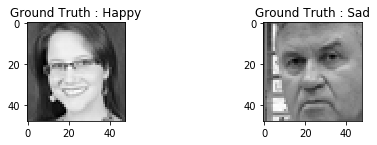

In [0]:
# resize plots
plt.figure(figsize=[6,4])
#plotting a sample training image
plt.subplot(1,3,1)
plt.imshow(np.squeeze(X_train[7]), cmap='gray')
plt.title("Ground Truth : {}".format(get_label(int(y_train[7]))))
#plotting another image
plt.subplot(1,3,3)
plt.imshow(np.squeeze(X_test[2]), cmap='gray')
plt.title("Ground Truth : {}".format(get_label(int(y_test[2]))))

# General Model

In [0]:
# General Model

def createModel():
    
    #Model Initialization
    model = Sequential() 
    
    #Adding Input Layer
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    #model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    #model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
  
    #Flattening
    model.add(Flatten())
    
    
    #Adding fully connected layer
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.4))
    
    #Adding Output Layer
    model.add(Dense(nClasses, activation='softmax'))
     
    return model

# Curves

In [0]:

#Plotting accuracy and loss curves for 1st model
def loss_curves(history):
  loss_train = history.history['loss']
  loss_val = history.history['val_loss']
  epochs = range(0,100)
  plt.plot(epochs, loss_train, 'b', label='Training Error')
  plt.plot(epochs, loss_val, 'r', label='testing Error')
  plt.title('Training and Testing Error')
  plt.xlabel('Epochs')
  plt.ylabel('Error')
  plt.legend()
  plt.show()
def acc_curves(history):
  # Accuracy Curves
  acc_train = history.history['acc']
  acc_val = history.history['val_acc']
  epochs = range(0,100)
  plt.plot(epochs, loss_train, 'b', label='Training Accuracy')
  plt.plot(epochs, loss_val, 'r', label='testing accuracy')
  plt.title('Training and Testing Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()
  

# Model 1 for RMSPROP


In [0]:
#Model 1 for RMSPROP
model1 = createModel()
batch_size = 256
epochs = 100
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 46, 46, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 23, 23, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 11, 11, 64)       

In [0]:
history = model1.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

Train on 28709 samples, validate on 3589 samples
Epoch 1/100
28709/28709 [==============================] - 10s 343us/step - loss: 1.8129 - acc: 0.2527 - val_loss: 1.7418 - val_acc: 0.2873
Epoch 2/100
28709/28709 [==============================] - 9s 304us/step - loss: 1.6288 - acc: 0.3602 - val_loss: 1.5237 - val_acc: 0.4118
Epoch 3/100
28709/28709 [==============================] - 9s 303us/step - loss: 1.4950 - acc: 0.4198 - val_loss: 1.4889 - val_acc: 0.4263
Epoch 4/100
28709/28709 [==============================] - 9s 305us/step - loss: 1.3902 - acc: 0.4653 - val_loss: 1.3430 - val_acc: 0.4921
Epoch 5/100
28709/28709 [==============================] - 9s 306us/step - loss: 1.3171 - acc: 0.4998 - val_loss: 1.2834 - val_acc: 0.5071
Epoch 6/100
28709/28709 [==============================] - 9s 304us/step - loss: 1.2527 - acc: 0.5245 - val_loss: 1.3537 - val_acc: 0.4815
Epoch 7/100
28709/28709 [==============================] - 9s 306us/step - loss: 1.2066 - acc: 0.5446 - val_loss: 1.

In [0]:
los1,acc1=model1.evaluate(test_data, test_labels_one_hot)

3589/3589 [==============================] - 1s 163us/step


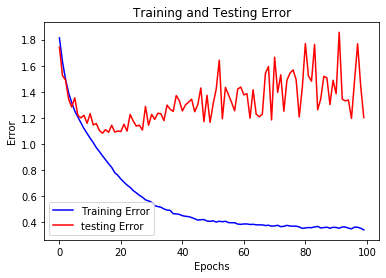

In [0]:
#Loss curves for RMSPROP
loss_curves(history)

# **MODEL 2 USING  SGD**

In [0]:

model2 = createModel()
batch_size = 256
epochs = 100
model2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 46, 46, 32)        9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 23, 23, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 11, 11, 64)       

In [0]:

history = model2.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

Train on 28709 samples, validate on 3589 samples
Epoch 1/100
28709/28709 [==============================] - 9s 302us/step - loss: 1.5054 - acc: 0.4211 - val_loss: 1.4746 - val_acc: 0.4455
Epoch 2/100
28709/28709 [==============================] - 8s 295us/step - loss: 1.5003 - acc: 0.4215 - val_loss: 1.5089 - val_acc: 0.4166
Epoch 3/100
28709/28709 [==============================] - 9s 299us/step - loss: 1.5021 - acc: 0.4244 - val_loss: 1.4702 - val_acc: 0.4394
Epoch 4/100
28709/28709 [==============================] - 8s 296us/step - loss: 1.4942 - acc: 0.4238 - val_loss: 1.4645 - val_acc: 0.4475
Epoch 5/100
28709/28709 [==============================] - 9s 299us/step - loss: 1.4924 - acc: 0.4240 - val_loss: 1.4776 - val_acc: 0.4397
Epoch 6/100
28709/28709 [==============================] - 9s 297us/step - loss: 1.4880 - acc: 0.4296 - val_loss: 1.4652 - val_acc: 0.4508
Epoch 7/100
28709/28709 [==============================] - 9s 297us/step - loss: 1.4900 - acc: 0.4265 - val_loss: 1.4

In [0]:

los2,acc2=model2.evaluate(test_data, test_labels_one_hot)

3589/3589 [==============================] - 1s 223us/step


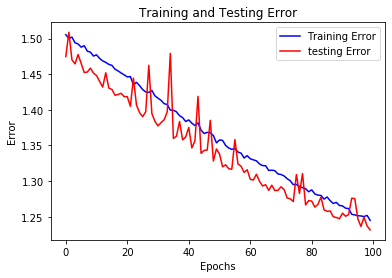

In [0]:
loss_curves(history)

# Model 3 Using Adam

In [0]:

model3 = createModel()
batch_size = 256
epochs = 100
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 46, 46, 32)        9248      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 23, 23, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 11, 11, 64)       

In [0]:

history = model3.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

Train on 28709 samples, validate on 3589 samples
Epoch 1/100
28709/28709 [==============================] - 10s 362us/step - loss: 1.7949 - acc: 0.2577 - val_loss: 1.7127 - val_acc: 0.3277
Epoch 2/100
28709/28709 [==============================] - 9s 311us/step - loss: 1.6072 - acc: 0.3735 - val_loss: 1.4883 - val_acc: 0.4263
Epoch 3/100
28709/28709 [==============================] - 9s 311us/step - loss: 1.4648 - acc: 0.4392 - val_loss: 1.3887 - val_acc: 0.4734
Epoch 4/100
28709/28709 [==============================] - 9s 311us/step - loss: 1.3679 - acc: 0.4771 - val_loss: 1.2878 - val_acc: 0.5174
Epoch 5/100
28709/28709 [==============================] - 9s 313us/step - loss: 1.2954 - acc: 0.5064 - val_loss: 1.2338 - val_acc: 0.5235
Epoch 6/100
28709/28709 [==============================] - 9s 313us/step - loss: 1.2398 - acc: 0.5301 - val_loss: 1.2028 - val_acc: 0.5442
Epoch 7/100
28709/28709 [==============================] - 9s 311us/step - loss: 1.1955 - acc: 0.5497 - val_loss: 1.

In [0]:
los3,acc3=model3.evaluate(test_data, test_labels_one_hot)

3589/3589 [==============================] - 1s 167us/step


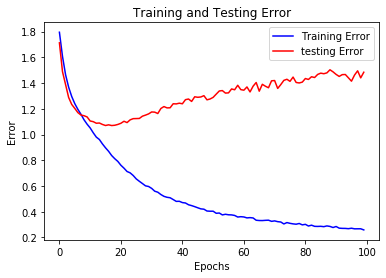

In [0]:
loss_curves(history)  

#Model 4 for adagrad

In [0]:

model4 = createModel()
batch_size = 256
epochs = 100
model4.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

model4.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 46, 46, 32)        9248      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 23, 23, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_34 (Dropout)         (None, 11, 11, 64)       

In [0]:

history = model4.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

Train on 28709 samples, validate on 3589 samples
Epoch 1/100
15360/28709 [===============>..............] - ETA: 3s - loss: 0.2819 - acc: 0.8977

KeyboardInterrupt: ignored

In [0]:
los4,acc4=model4.evaluate(test_data, test_labels_one_hot)

3589/3589 [==============================] - 1s 169us/step


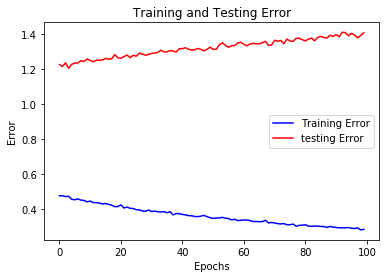

In [0]:
loss_curves(history)

# **VISUALISATION**

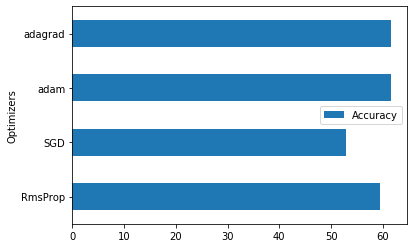

In [0]:
df = pd.DataFrame({'Optimizers':[ 'RmsProp','SGD', 'adam','adagrad'], 'Accuracy':[acc1*100,acc2*100,acc3*100,acc4*100]})
ax = df.plot.barh(x='Optimizers', y='Accuracy')
    

# Testing with the runtime image

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      0.
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


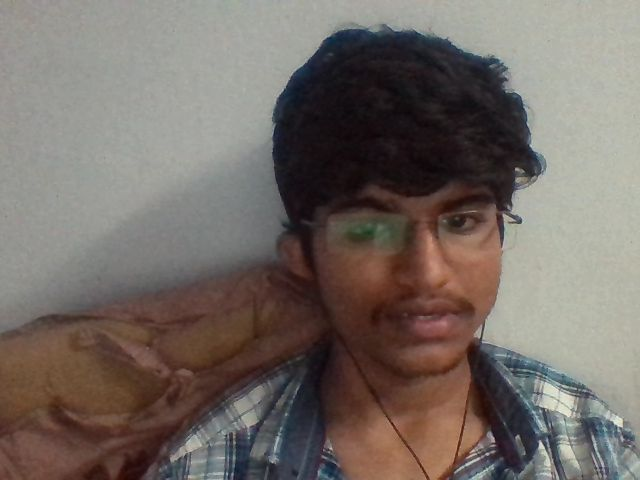

In [0]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [0]:
#Cropping image

from PIL import Image
import cv2
import matplotlib.pyplot as plt

faces = []

img = Image.open("/content/angry1.jpg")
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(np.asarray(img), 1.3, 5)
for (x, y, w, h) in faces:
  if len(faces) == 1:
    crop_img = img.crop((x,y,x+w,y+h))
  else:
    print("multiple faces detected, passing over image")

plt.imshow(crop_img)
crop_img.save('photo.jpg')

error: ignored

In [0]:
import PIL
from PIL import Image
import cv2
img=Image.open('/content/photo.jpg')
test_image = img.resize((48,48),Image.ANTIALIAS)
test_image = np.array(test_image)
gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

#scale pixels values to lie between 0 and 1 because we did same to our train and test set
gray = gray/255

#reshaping image (-1 is used to automatically fit an integer at it's place to match dimension of original image)
gray = gray.reshape(-1, 48, 48, 1)
model3=  tf.keras.models.load_model("C:\\Users\\Ramakrishna\\Downloads\\Adam model.h5")
res = model3.predict(gray)

#argmax returns index of max value
result_num = np.argmax(res)
res = model3.predict(gray)

#argmax returns index of max value
result_num = np.argmax(res)
labels = ['Angry','Disgust','Fear','Happy','Sad' , 'Surprise','Neutral']
# this is for plotting purpose
index = np.arange(len(labels))


OSError: ignored

Probabilities are 
Angry:0.8943278
Disgust:0.0010292687
Fear:0.10356202
Happy:1.1779299e-05
Sad:0.00092716253
Surprise:4.288029e-05
Neutral:9.906312e-05

Emotion is Angry


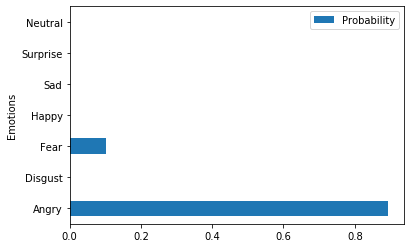

In [0]:
x=""
for i in range(len(res[0])):
    x=x+get_label(i)+":"+str(res[0][i])+"\n"
str1="Probabilities are \n" + x+"\n"+"Emotion is "+get_label(result_num)
print(str1)
df = pd.DataFrame({'Emotions':[ 'Angry','Disgust', 'Fear','Happy',"Sad",'Surprise','Neutral'], 'Probability':res[0]})
ax = df.plot.barh(x='Emotions', y='Probability')
    

# Sample LoG for some image

In [0]:
!pip install mahotas

     |████████████████████████████████| 1.5MB 2.7MB/s 
  Created wheel for mahotas: filename=mahotas-1.4.8-cp36-cp36m-linux_x86_64.whl size=4264010 sha256=6e0ca6d40f7803ca3389706ca9a87d45464ef4c97cd4028220ff6d2815015830
  Stored in directory: /root/.cache/pip/wheels/3e/8b/93/690deca49a46242df274db70dbef26c0a6fa86e378b677e1ab
Successfully built mahotas


In [0]:
from PIL import Image
import cv2
def LoG(data):
  
  data = cv2.Laplacian(cv2.GaussianBlur(data,(3,3),0),cv2.CV_64F)
  return data.reshape(48,48,1)


In [0]:
xx=X_train
for i in range(xx.shape[0]):
  xx[i]=LoG(xx[i])

Text(0.5, 1.0, 'Ground Truth : Sad')

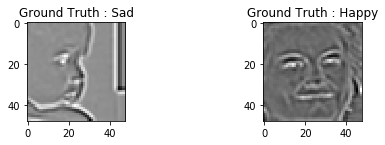

In [0]:
# Change to float datatype
train_data = X_train.astype('float32')
test_data = X_test.astype('float32')

# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(y_train)
test_labels_one_hot = to_categorical(y_test)
a=LoG(X_train[7])

plt.subplot(1,3,3)
plt.imshow(np.squeeze(xx[100]), cmap='gray')
plt.title("Ground Truth : {}".format(get_label(int(y_test[100]))))

plt.subplot(1,3,1)
plt.imshow(np.squeeze(X_train[12]), cmap='gray')
plt.title("Ground Truth : {}".format(get_label(int(y_test[12]))))

# Log Model

In [0]:

model5 = createModel()
batch_size = 256
epochs = 100
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model5.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 46, 46, 32)        9248      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 23, 23, 64)        18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 11, 11, 64)      

In [0]:

history = model5.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

Train on 28709 samples, validate on 3589 samples
Epoch 1/100
28709/28709 [==============================] - 10s 364us/step - loss: 1.7351 - acc: 0.2959 - val_loss: 2.1175 - val_acc: 0.1549
Epoch 2/100
28709/28709 [==============================] - 9s 309us/step - loss: 1.4615 - acc: 0.4420 - val_loss: 3.0961 - val_acc: 0.1697
Epoch 3/100
28709/28709 [==============================] - 9s 310us/step - loss: 1.3546 - acc: 0.4825 - val_loss: 2.3943 - val_acc: 0.1446
Epoch 4/100
28709/28709 [==============================] - 9s 307us/step - loss: 1.2764 - acc: 0.5123 - val_loss: 2.3944 - val_acc: 0.1429
Epoch 5/100
28709/28709 [==============================] - 9s 308us/step - loss: 1.2230 - acc: 0.5385 - val_loss: 2.4777 - val_acc: 0.1304
Epoch 6/100
28709/28709 [==============================] - 9s 309us/step - loss: 1.1764 - acc: 0.5547 - val_loss: 2.9662 - val_acc: 0.1304
Epoch 7/100
28709/28709 [==============================] - 9s 308us/step - loss: 1.1345 - acc: 0.5711 - val_loss: 3.

In [0]:
los5,acc5=model5.evaluate(test_data, test_labels_one_hot)

3589/3589 [==============================] - 1s 192us/step


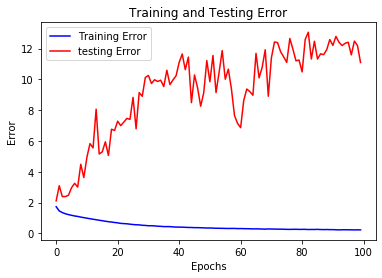

In [0]:
loss_curves(history)

# RunTime Image


In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      0.
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


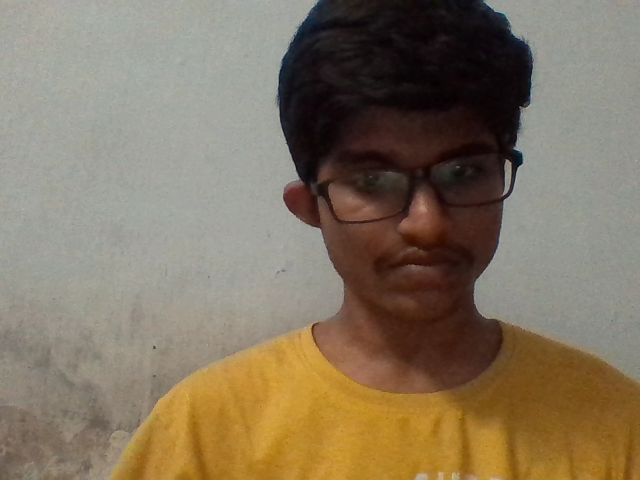

In [0]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

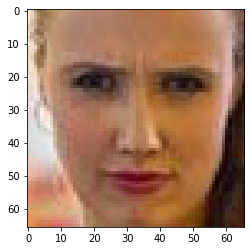

In [0]:
#Cropping image

from PIL import Image
import cv2
import matplotlib.pyplot as plt

faces = []

img = Image.open("/content/pic.jpg")
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(np.asarray(img), 1.3, 5)
for (x, y, w, h) in faces:
  if len(faces) == 1: #Use simple check if one face is detected, or multiple (measurement error unless multiple persons on image)
    crop_img = img.crop((x,y,x+w,y+h))
  else:
    print("multiple faces detected, passing over image")

plt.imshow(crop_img)
crop_img.save('photo.jpg')

In [0]:

import PIL
from PIL import Image
import cv2
img=Image.open('/content/photo.jpg')
test_image = img.resize((48,48),Image.ANTIALIAS)
test_image = np.array(test_image)
gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
gray = LoG(gray).reshape(-1, 48, 48, 1)
gray=gray/255
plt.imshow(np.squeeze(gray),cmap='gray')
res = model5.predict(gray)

#argmax returns index of max value
result_num = np.argmax(res)
labels = ['Angry','Disgust','Fear','Happy','Sad' , 'Surprise','Neutral']
# this is for plotting purpose
index = np.arange(len(labels))
plt.figure(figsize=[6,4])
plt.imshow(img, cmap='gray')

plt.show()


NameError: ignored

In [0]:
x=""
for i in range(len(res[0])):
    x=x+get_label(i)+":"+str(res[0][i])+"\n"
str1="Probabilities are \n" + x+"\n"+"Emotion is "+get_label(result_num)
print(str1)
df = pd.DataFrame({'Emotions':[ 'Angry','Disgust', 'Fear','Happy',"Sad",'Surprise','Neutral'], 'Probability':res[0]})
ax = df.plot.barh(x='Emotions', y='Probability')
    

NameError: ignored

In [0]:
!pip install opencv-contrib-python


In [0]:
import cv2
import numpy as np

img = cv2.imread('pic.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

kp = sift.detect(gray,None)

img=cv2.drawKeypoints(gray,kp)

cv2.imwrite('sift_keypoints.jpg',img)
img=cv2.drawKeypoints(gray,kp,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imwrite('sift_keypoints.jpg',img)

NameError: ignored

In [0]:
import cv2
img = cv2.imread('Nithish.jpg',0)

# Create SURF object. You can specify params here or later.
# Here I set Hessian Threshold to 400
surf = cv2.SURF(400)

# Find keypoints and descriptors directly
kp, des = surf.detectAndCompute(img,None)

len(kp)



AttributeError: ignored

In [0]:
# Check present Hessian threshold
print(surf.hessianThreshold)
#400.0

# We set it to some 50000. Remember, it is just for representing in picture.
# In actual cases, it is better to have a value 300-500
surf.hessianThreshold = 50000

# Again compute keypoints and check its number.
kp, des = surf.detectAndCompute(img,None)

print len(kp)
#47

In [0]:
img2 = cv2.drawKeypoints(img,kp,None,(255,0,0),4)

plt.imshow(img2),plt.show()

NameError: ignored

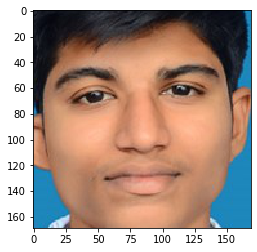

In [0]:

from PIL import Image
import cv2
import matplotlib.pyplot as plt

faces = []

img = Image.open("/content/Itha Venkata Siva Ramakrishna.jpg")
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(np.asarray(img), 1.3, 5)
for (x, y, w, h) in faces:
  if len(faces) == 1: #Use simple check if one face is detected, or multiple (measurement error unless multiple persons on image)
    crop_img = img.crop((x,y,x+w,y+h))
  else:
    print("multiple faces detected, passing over image")

plt.imshow(crop_img)



In [0]:
crop_img.save('photo.jpg')
import PIL
from PIL import Image
import cv2

img=Image.open('/content/photo.jpg')
test_image = img.resize((48,48),Image.ANTIALIAS)
test_image = np.array(test_image)
gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
gray/=255
gray = LoG(gray).reshape(-1, 48, 48, 1)
plt.imshow(np.squeeze(gray),cmap='gray')


TypeError: ignored

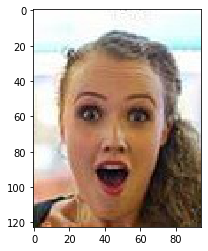

In [0]:

from PIL import Image
import cv2
import matplotlib.pyplot as plt

faces = []

img = Image.open("/content/emotion_surprise.png")
plt.imshow(img)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(np.asarray(img), 1.3, 5)
for (x, y, w, h) in faces:
  if len(faces) == 1: #Use simple check if one face is detected, or multiple (measurement error unless multiple persons on image)
    crop_img = img.crop((x,y,x+w,y+h))
  else:
    print("multiple faces detected, passing over image")


crop_img.save('photo.jpg')


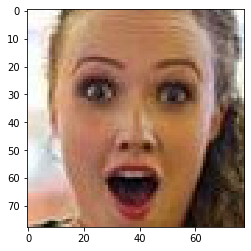

In [0]:
plt.imshow(crop_img)

In [0]:
crop_img.save('photo.jpg')
import PIL
from PIL import Image
import cv2

img=Image.open('/content/photo.jpg')
test_image = img.resize((48,48),Image.ANTIALIAS)
test_image = np.array(test_image)
gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
gray/=255
gray = gray.reshape(-1, 48, 48, 1)
plt.imshow(np.squeeze(gray),cmap='gray')


TypeError: ignored